# Práctica 2: Introducción a PyTorch

## a) Calculando el gradiente mediante Autograd

En primer lugar, vamos a calcular del gradiente para el perceptrón simple con función de activación sigmoidea que vimos en la teoría. Pero esta vez, en lugar de realizar manualmente el proceso de backpropagation, vamos a usar el módulo `autograd` de PyTorch.

La función $f(x, w)$ a la cual queremos encontrarle el gradiente es:

> $f(\mathbf{x}, \mathbf{w}) = \frac{1}{1 + e^{2-(w_0 x_0 + w_1 x_1 + w_2)}}$

Definimos entonces la función utilizando `torch.tensor` (recordar usar el parámetro `requires_grad = True` para que PyTorch guarde los gradientes) y realizamos la pasada "forward" para los siguientes valores de x y w:

> $\mathbf{x} = (-1, -2)$

> $\mathbf{w} = (2, -3, -3)$



In [45]:
import torch
#defini e como la constante de euler

e = torch.tensor([2.718281828465590], requires_grad=False) #con requires_grad = False Pytorch no guarda los gradientes, por default su valor es Fals

x = torch.tensor([-1., -2.], requires_grad=True) #con required_grad = True Pytorch guarda los gradientes, son los datos de entrada

w = torch.tensor([2., -3., -3.], requires_grad=True) #los pesos 

f = 1 / (1+e[0]**(2-(w[0]*x[0]+w[1]*x[1]+w[2]))) #es el valor de la función de activación dados x y w

print(f)


tensor(0.2689, grad_fn=<MulBackward0>)


Ahora, utilizando la función `f.backward()` computamos los gradientes $\frac{\partial f}{ \partial \mathbf{x}}$ y $\frac{\partial f}{ \partial \mathbf{w}}$

In [46]:
f.backward() #calcula los gradientes de f con respecto a x y w

In [47]:
print("Gradiente df/dx = " + str(x.grad))
print("Gradiente df/dw = " + str(w.grad)) #imprimimos los gradientes de f con respecto a x y w

Gradiente df/dx = tensor([ 0.3932, -0.5898])
Gradiente df/dw = tensor([-0.1966, -0.3932,  0.1966])


## b) Minimizando una función con Gradient Descent

Ahora, vamos a implementar usar el algorítmo de gradiente descendiente (utilizando Autograd para computar el gradiente) para minimizar la función cuadrática $$f(x) = 2x^2 + x + 4$$

Utilizaremos la implementación `torch.optim.SGD` de gradiente descendiente.



C:\Users\Goico\AppData\Local\Temp\ipykernel_8140\1148398619.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor( torch.rand(1) , requires_grad=True) #peso a optimizar


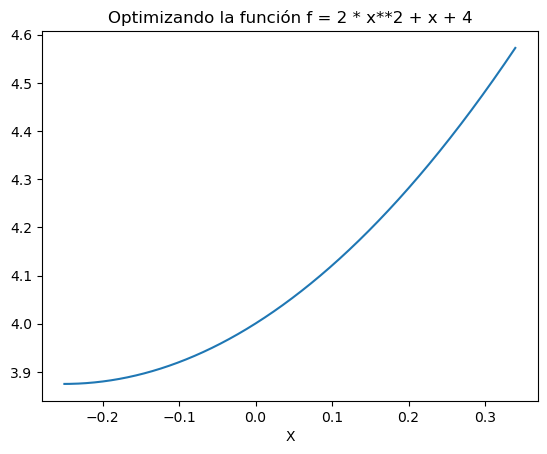

In [48]:
import matplotlib.pyplot as plt

# Definir la variable que será el parámetro a optimizar
#definir x con un valor inicial aleatorio

x = torch.tensor( torch.rand(1) , requires_grad=True) #peso a optimizar

# Definir el optimizador, indicando el parámetro a optimizar y el learning rate
optimizer = torch.optim.SGD([x], lr=0.0005) #optimizador de gradiente descendiente

# Acumuladores que usaremos para guardar los valores sucesivos de x, y
f_values = []
x_values = []

# Loop de optimización
for i in range(4000):

    # Setemos en 0 los gradientes de todos los elementos
    optimizer.zero_grad() #inicializa los gradientes de todos los elementos en 0 porque si no se acumulan en cada paso de optimización 

    # Pasada forward: ejecutar la función a minimizar
    f = 2 * x**2 + x + 4 #computa el valor de f con el x que tenemos

    #print("X = " + str(x) + ", f(x) = " + str(f))

    # Pasada backward: computar los gradientes
    f.backward()

    # Actualizar los pesos dando un paso de gradiente descendiente
    optimizer.step()

    # Guardar los valores para luego plotearlos
    f_values.append(f.data.item())
    x_values.append(x.data.item())

# Ploteo los valores
plt.title("Optimizando la función f = 2 * x**2 + x + 4")
plt.xlabel("X")
plt.plot(x_values,f_values)



In [49]:
x_values[-1] #valor donde f alcanza el mínimo

-0.24980346858501434

In [50]:
f_values[-1] #valor mínimo de f

3.875

# c) Implementando un MLP en PyTorch para predicción del procentaje de grasa corporal

Contamos con una base de datos [1] de 252 mediciones del porcentaje de grasa corporal de 252 personas diferentes, el cual puede ser estimado mediante otras características, como la edad, el peso, y mediciones en diferentes partes del cuerpo. A partir de estos datos se pretende desarrollar un sistema que permita predecir dicho porcentaje a partir de las características.

[1]: Olson, R.S., La Cava, W., Orzechowski, P. et al. PMLB: a large benchmark suite for machine learning evaluation and comparison. BioData Mining 10, 36 (2017). https://epistasislab.github.io/pmlb/profile/560_bodyfat.html

Antes de comenzar, vamos a instalar el paquete de Python que contiene la base de datos:

In [51]:
pip install pmlb

Note: you may need to restart the kernel to use updated packages.


Ahora vamos a generar un histograma de todas las mediciones del porcentaje con todos los datos disponibles:

Fila de ejemplo:
['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']
[  1.0708  23.     154.25    67.75    36.2     93.1     85.2     94.5
  59.      37.3     21.9     32.      27.4     17.1   ]


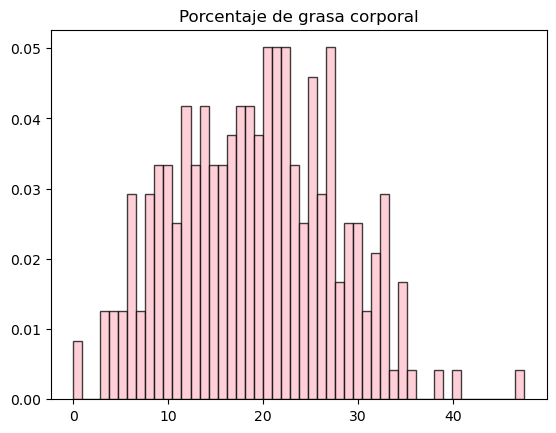

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from pmlb import fetch_data

# Importamos el dataset
body_fat = fetch_data('560_bodyfat')
body_fat.describe()

# Extraigo los datos (features) y los porcentajes (etiquetas a predecir)
data = body_fat.loc[:, body_fat.columns != 'target'].to_numpy()
percentages = body_fat.loc[:, body_fat.columns == 'target'].to_numpy()

data = data.astype(np.float32)
percentages = percentages.astype(np.float32)

print("Fila de ejemplo:")
print(list(body_fat.columns))
print(data[0,:])

# Dibujo un histograma del porcentaje de grasa corporal usando todos los datos
_ = plt.hist(percentages, 50, density=True, facecolor='pink', alpha=0.75, edgecolor='black')
_ = plt.title("Porcentaje de grasa corporal")


Particionamos los datos en entrenamiento y prueba usando la función `sklearn.model_selection.train_test_split`

In [53]:
from sklearn.model_selection import train_test_split

 # Particiono los datos en entrenamiento y prueba usando el método de scikitlearn
X_train, X_test, y_train, y_test = train_test_split( data ,percentages, test_size=0.33, random_state=42)

Ahora implementaremos en PyTorch un Perceptrón multicapa que usaremos como regresor del porcentaje de grasa corporal (ejemplo basado en el curso de [RPI](https://rpi.analyticsdojo.com/)).

El perceptrón deberá contar con 3 capas:
- Las dos primeras con 200 neuronas, y deberán usar la función de activación ReLU.
- La última con una única neurona cuya salida sea un valor escalar que corresponda al porcentaje de grasa corporal estimado de la persona, que no deberá utilizar ninguna función de activación.

Algunas clases de PyTorch que resultarán útiles para implementar el modelo, son:
- `torch.nn.Linear`: Implementa una capa totalmente conectada. Es necesario especificarle el número de parámetros de entrada y de salida.
- `torch.nn.functional.relu`: Implementa la función de activación ReLU.

Además, utilizaremos el optimizador `torch.optim.Adam` y la función de pérdida `torch.nn.MSELoss` (error cuadrático medio).






Epoch 100, loss = 21.6459
Epoch 200, loss = 16.6869
Epoch 300, loss = 17.1389
Epoch 400, loss = 15.6569
Epoch 500, loss = 18.1155
Epoch 600, loss = 14.0581
Epoch 700, loss = 11.3454
Epoch 800, loss = 15.1311
Epoch 900, loss = 9.81226
Epoch 1000, loss = 11.8563
Epoch 1100, loss = 6.14967
Epoch 1200, loss = 7.12967
Epoch 1300, loss = 8.51863
Epoch 1400, loss = 3.67172
Epoch 1500, loss = 3.28313
Epoch 1600, loss = 3.96532
Epoch 1700, loss = 3.23274
Epoch 1800, loss = 4.74133
Epoch 1900, loss = 1.29907
Epoch 2000, loss = 1.91272
Epoch 2100, loss = 1.01604
Epoch 2200, loss = 1.38849
Epoch 2300, loss = 0.965173
Epoch 2400, loss = 0.763057
Epoch 2500, loss = 0.765999
Epoch 2600, loss = 0.504774
Epoch 2700, loss = 0.672156
Epoch 2800, loss = 1.90194
Epoch 2900, loss = 0.299553
Epoch 3000, loss = 0.958404
Epoch 3100, loss = 0.353794
Epoch 3200, loss = 1.87534
Epoch 3300, loss = 0.216525
Epoch 3400, loss = 0.684829
Epoch 3500, loss = 1.1659
Epoch 3600, loss = 0.787151
Epoch 3700, loss = 0.510795

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento')

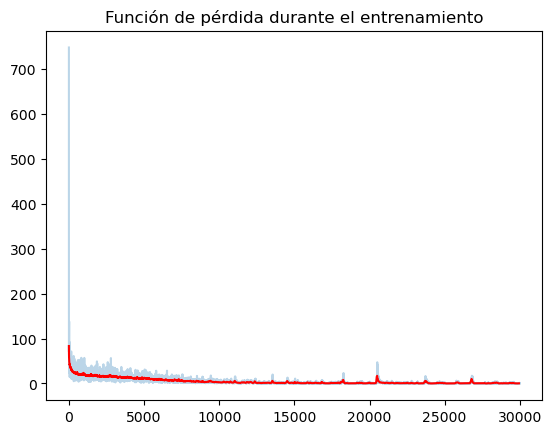

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Tamaño del batch de entrenamiento
batch_size = 32 #vamos viendo de a partes el entrenamiento

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 1e-3 #0.001

class Net(torch.nn.Module):
    def __init__(self, input_features, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_features, size_hidden)
        self.hidden2 = nn.Linear(size_hidden, size_hidden)
        self.out = nn.Linear(size_hidden, n_output)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden1(x))
        x = torch.nn.functional.relu(self.hidden2(x))
        x = self.out(x)
        return x

# Definimos el modelo del perceptrón
input_features = 14 # 14 atributos
size_hidden = 200 # Número de neuronas en la capa oculta
n_output = 1 # Número de neuronas en la capa de salida

net = Net(input_features, size_hidden, n_output)



# Construimos el optimizador, y le indicamos que los parámetros a optimizar
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam(net.parameters() , lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = nn.MSELoss() #funcion LOSS

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a un batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 5000 #una epoca es ver una vez todo mi dataset, esto lo hago 5000 veces en este caso
# 5000 * N/32 es la cantidad de pasos del gradiente

# Lista en la que iremos guardando el valor de la función de pérdida en cada etapa de entrenamiento
loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.zero_grad()

        # Realizo la pasada forward por la 
        outputs = net(x)
        loss = criterion(outputs, y.view(-1, 1))

        # Realizo la pasada backward por la red
        loss.backward()

        # Actualizo los pesos de la red con el optimizador
        optimizer.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento")

MSE medio en training: 0.40502495
MSE medio en test: 37.882214


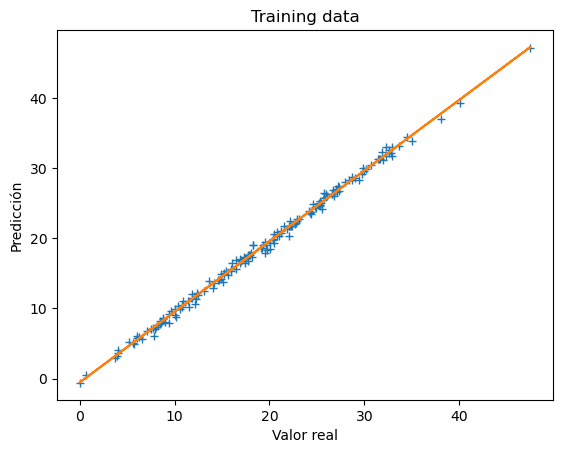

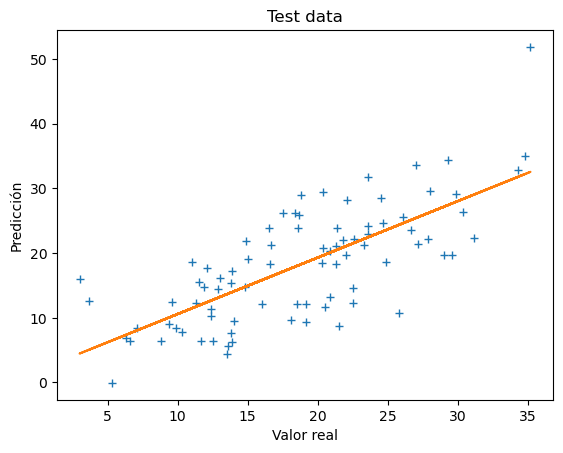

In [55]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm

# Definimos un método para mostrar las predicciones como un scatter plot
# y graficamos la recta de regresión para esos datos.
def plotScatter(x_data, y_data, title, fit_line=True):
  plt.figure()

  plt.plot(x_data, y_data, '+')
  plt.xlabel('Valor real')
  plt.ylabel('Predicción')
  plt.title(title)

  if fit_line:
    X, Y = x_data.reshape(-1,1), y_data.reshape(-1,1)
    plt.plot( X, LinearRegression().fit(X, Y).predict(X) )

# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test)**2).mean()))

# Entregable
1. Encontrar el mínimo de la función *f* definida en el apartado b). Para ello, deberán encontrar primero la derivada *f'(x)* de forma analítica, y utilizarla para computar el mínimo de la función. Posteriormente, deberán corrobarar que el valor coincida con el que obtuvieron optimizando la función con gradiente descendiente.

2. Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia. Probar colocando 2, 10 y 200 neuronas en dichas capas, al entrenar los perceptrones durante 5000 épocas. Mostrar los resultados utilizando:

* los gráficos de dispersión con la recta de regresión
* el error medio en los datos de entrenamiento y test

  Analizar la relación entre dichos resultados y la cantidad de neuronas que posee el perceptrón.


```markdown
Función original:
f(x) = 2x^2 + x + 4

Primera derivada:
f'(x) = 4x + 1

Punto crítico:
x = -1/4

f(-1/4) = 1/8 + 4 - 1/4
         = 4 - 1/8
         = 3 + 7/8 (aproximadamente 3.875)

El valor analítico coincide con el resultado obtenido al optimizar la función con el método de gradiente descendiente, como se esperaba.


2. 

Epoch 100, loss = 57.8677
Epoch 200, loss = 33.4668
Epoch 300, loss = 28.1157
Epoch 400, loss = 26.3058
Epoch 500, loss = 23.8294
Epoch 600, loss = 23.1533
Epoch 700, loss = 22.1047
Epoch 800, loss = 21.3691
Epoch 900, loss = 20.5265
Epoch 1000, loss = 20.525
Epoch 1100, loss = 20.1345
Epoch 1200, loss = 18.8129
Epoch 1300, loss = 18.4197
Epoch 1400, loss = 17.8616
Epoch 1500, loss = 18.1522
Epoch 1600, loss = 17.3258
Epoch 1700, loss = 18.0561
Epoch 1800, loss = 17.056
Epoch 1900, loss = 17.7589
Epoch 2000, loss = 17.2374
Epoch 2100, loss = 17.6033
Epoch 2200, loss = 16.9245
Epoch 2300, loss = 17.9398
Epoch 2400, loss = 17.2599
Epoch 2500, loss = 16.3846
Epoch 2600, loss = 16.3384
Epoch 2700, loss = 16.1444
Epoch 2800, loss = 15.8805
Epoch 2900, loss = 16.1899
Epoch 3000, loss = 15.9109
Epoch 3100, loss = 19.0286
Epoch 3200, loss = 17.5129
Epoch 3300, loss = 16.6629
Epoch 3400, loss = 16.275
Epoch 3500, loss = 16.0514
Epoch 3600, loss = 16.0403
Epoch 3700, loss = 15.7476
Epoch 3800, l

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento con 10 neuronas en la capa oculta')

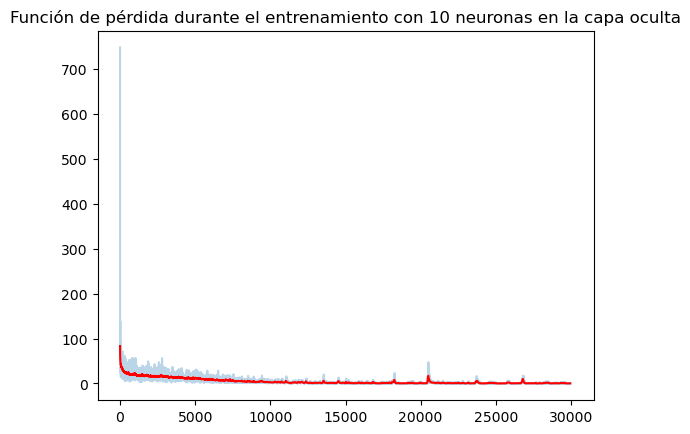

In [56]:
input_features = 14 # 14 atributos
size_hidden = 10 # Número de neuronas en la capa oculta
n_output = 1 # Número de neuronas en la capa de salida

net = Net(input_features, size_hidden, n_output)



# Construimos el optimizador, y le indicamos que los parámetros a optimizar
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam(net.parameters() , lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = nn.MSELoss() #funcion LOSS

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a un batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 5000 #una epoca es ver una vez todo mi dataset, esto lo hago 5000 veces en este caso
# 5000 * N/32 es la cantidad de pasos del gradiente

# Lista en la que iremos guardando el valor de la función de pérdida en cada etapa de entrenamiento
loss_list_10 = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.zero_grad()

        # Realizo la pasada forward por la 
        outputs = net(x)
        loss = criterion(outputs, y.view(-1, 1))

        # Realizo la pasada backward por la red
        loss.backward()

        # Actualizo los pesos de la red con el optimizador
        optimizer.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list_10.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento con 10 neuronas en la capa oculta")

MSE medio en training: 15.685808
MSE medio en test: 21.353134


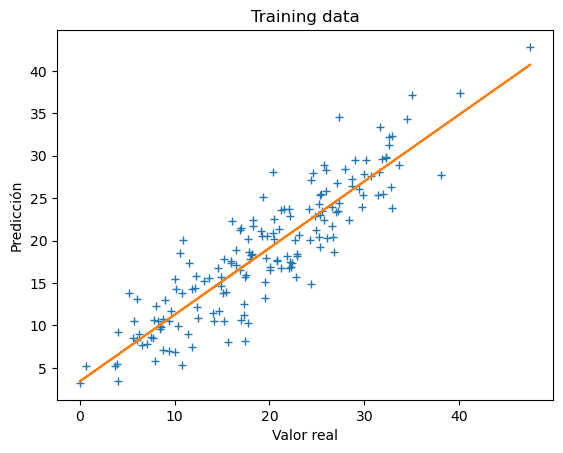

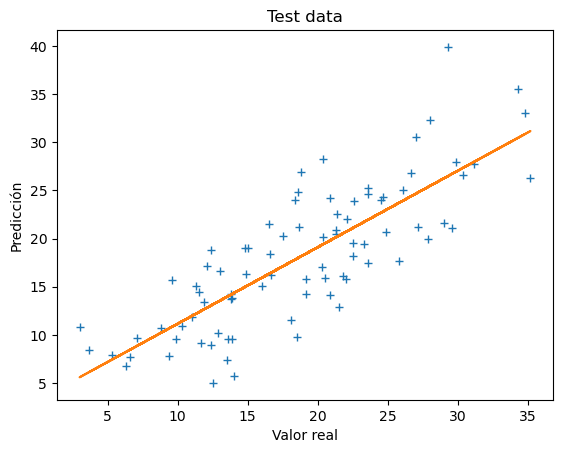

In [57]:
py = net(torch.FloatTensor(X_train))
y_pred_train_10 = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train_10, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test_10 = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test_10, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train_10)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test_10)**2).mean()))

Epoch 100, loss = 382.765
Epoch 200, loss = 287.983
Epoch 300, loss = 192.731
Epoch 400, loss = 124.802
Epoch 500, loss = 90.0382
Epoch 600, loss = 79.1996
Epoch 700, loss = 77.4534
Epoch 800, loss = 77.3133
Epoch 900, loss = 77.3074
Epoch 1000, loss = 77.3067
Epoch 1100, loss = 77.3077
Epoch 1200, loss = 77.3087
Epoch 1300, loss = 77.3036
Epoch 1400, loss = 77.3071
Epoch 1500, loss = 77.3051
Epoch 1600, loss = 77.308
Epoch 1700, loss = 77.311
Epoch 1800, loss = 77.3077
Epoch 1900, loss = 77.3107
Epoch 2000, loss = 77.3145
Epoch 2100, loss = 77.3058
Epoch 2200, loss = 77.3049
Epoch 2300, loss = 77.3061
Epoch 2400, loss = 77.3111
Epoch 2500, loss = 77.3139
Epoch 2600, loss = 77.3176
Epoch 2700, loss = 77.3039
Epoch 2800, loss = 77.3081
Epoch 2900, loss = 77.3089
Epoch 3000, loss = 77.3075
Epoch 3100, loss = 77.3124
Epoch 3200, loss = 77.3039
Epoch 3300, loss = 77.3076
Epoch 3400, loss = 77.3073
Epoch 3500, loss = 77.3067
Epoch 3600, loss = 77.3099
Epoch 3700, loss = 77.3164
Epoch 3800, 

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento con 2 neuronas en la capa oculta')

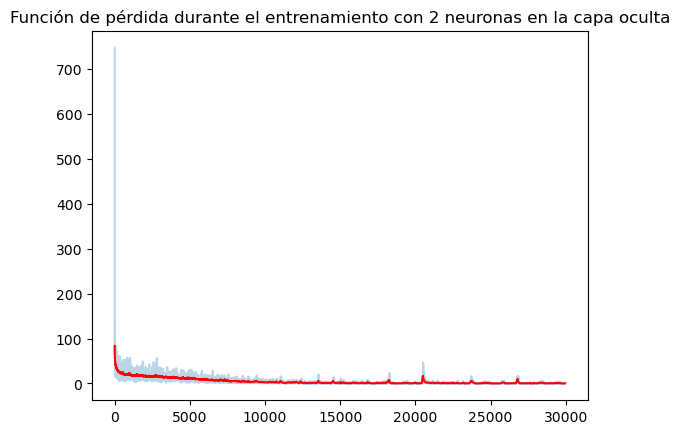

In [58]:
input_features = 14 # 14 atributos
size_hidden = 2 # Número de neuronas en la capa oculta
n_output = 1 # Número de neuronas en la capa de salida

net = Net(input_features, size_hidden, n_output)



# Construimos el optimizador, y le indicamos que los parámetros a optimizar
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam(net.parameters() , lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = nn.MSELoss() #funcion LOSS

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a un batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 5000 #una epoca es ver una vez todo mi dataset, esto lo hago 5000 veces en este caso
# 5000 * N/32 es la cantidad de pasos del gradiente

# Lista en la que iremos guardando el valor de la función de pérdida en cada etapa de entrenamiento
loss_list_2 = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.zero_grad()

        # Realizo la pasada forward por la 
        outputs = net(x)
        loss = criterion(outputs, y.view(-1, 1))

        # Realizo la pasada backward por la red
        loss.backward()

        # Actualizo los pesos de la red con el optimizador
        optimizer.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list_2.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento con 2 neuronas en la capa oculta")

MSE medio en training: 77.3046
MSE medio en test: 54.81343


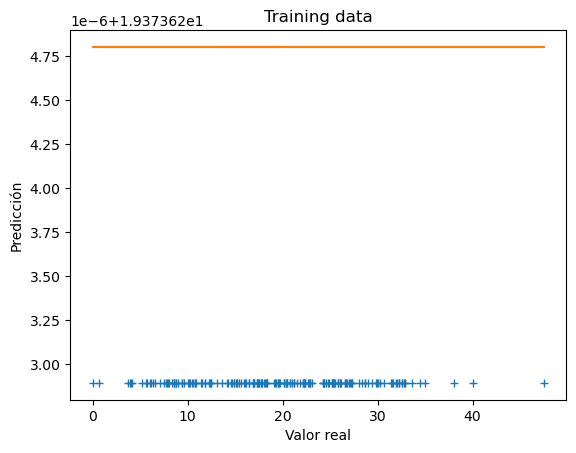

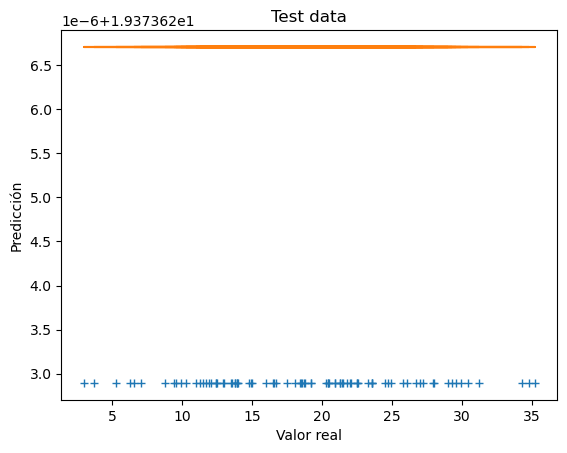

In [59]:
py = net(torch.FloatTensor(X_train))
y_pred_train_2 = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train_2, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test_2 = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test_2, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train_2)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test_2)**2).mean()))

In [60]:
print("Para el caso con 200 neuronas ocultas nos dio un error en el train de: " , str(((y_train - y_pred_train)**2).mean()) ,"para test: " , str(((y_test - y_pred_test)**2).mean()) )

print("Para el caso con 10 neuronas ocultas nos dio un error en el train de: " , str(((y_train - y_pred_train_10)**2).mean()) ,"para test: " , str(((y_test - y_pred_test_10)**2).mean()) )

print("Para el caso con 2 neuronas ocultas nos dio un error en el train de: " , str(((y_train - y_pred_train_2)**2).mean()) ,"para test: " , str(((y_test - y_pred_test_2)**2).mean()) )


Para el caso con 200 neuronas ocultas nos dio un error en el train de:  0.40502495 para test:  37.882214
Para el caso con 10 neuronas ocultas nos dio un error en el train de:  15.685808 para test:  21.353134
Para el caso con 2 neuronas ocultas nos dio un error en el train de:  77.3046 para test:  54.81343


Después de ejecutar varias veces los modelos, observamos que aquellos con solo 2 neuronas por capa oculta son muy sensibles a los pesos iniciales aleatorios, lo que resulta en una falta de consistencia en su desempeño, por lo que terminamos descartandolo. Aunque el modelo con 200 neuronas logra un error de entrenamiento considerablemente menor que el de 10, este tiende a sobreajustar los datos, como se refleja en un MSE de test mas alto y en el grafico de dispersion con su correspondiente recta de regresion, por lo que tambien lo terminamos descartando. Terminamos eligiendo el modelo con 10 neuronas por capa oculta, ya que resulta ser mas consistente y a pesar de tener un error en train mas alto, su error de test fue menor .